<a href="https://colab.research.google.com/github/joseogg/textanalytics/blob/main/clusterizar_libros_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías 

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

# Corpus etiquetado

In [ ]:
etiquetas = ["shakespeare_the_merchant_of_venice", 
             "shakespeare_romeo_juliet", 
             "shakespeare_hamlet", 
             "dickens_a_christmas_carol", 
             "dickens_oliver_twist",
             "dickens_a_tale_of_two_cities"]
corpus = []

for etiqueta in etiquetas:
  archivo = open(etiqueta + ".txt", "r")
  corpus.append(archivo.read())
  archivo.close()

etiquetas = ["shakespeare_the_merchant_of_venice", 
             "shakespeare_romeo_juliet", 
             "shakespeare_hamlet", 
             "dickens_a_christmas_carol", 
             "dickens_oliver_twist",
             "dickens_a_tale_of_two_cities"]

corpus = np.array(corpus)
df_corpus = pd.DataFrame({"documento": corpus, 
                          "categoria": etiquetas})
df_corpus

,documento,categoria
0,"project,gutenberg,ebook,merchant,venice,willia...",shakespeare_the_merchant_of_venice
1,"project,gutenberg,ebook,romeo,juliet,william,s...",shakespeare_romeo_juliet
2,"project,gutenberg,ebook,hamlet,william,shakesp...",shakespeare_hamlet
3,"project,gutenberg,ebook,christmas,carol,charle...",dickens_a_christmas_carol
4,"project,gutenberg,ebook,oliver,twist,charles,d...",dickens_oliver_twist
5,"project,gutenberg,ebook,tale,two,city,charles,...",dickens_a_tale_of_two_cities


# Modelo de Bolsa de Palabras

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# bolsa de palabras en matriz dispersa
count_vectorizer = CountVectorizer(min_df=0.0, max_df=1.0)
matriz_conteo = count_vectorizer.fit_transform(corpus)
matriz_conteo

<6x15164 sparse matrix of type '<class 'numpy.int64'>'
	with 30424 stored elements in Compressed Sparse Row format>

In [ ]:
# ver valores diferentes de cero en la matriz dispersa
print(matriz_conteo)

  (0, 10315)	90
  (0, 6108)	99
  (0, 4317)	20
  (0, 8386)	20
  (0, 14294)	45
  (0, 14871)	4
  (0, 11781)	5
  (0, 1652)	8
  (0, 8214)	17
  (0, 11189)	18
  (0, 59)	2
  (0, 7745)	36
  (0, 13227)	12
  (0, 567)	5
  (0, 7486)	1
  (0, 1783)	11
  (0, 9390)	5
  (0, 1065)	1
  (0, 4611)	1
  (0, 6611)	1
  (0, 14849)	1
  (0, 183)	1
  (0, 13475)	8
  (0, 85)	7
  (0, 1710)	6
  :	:
  (5, 8286)	1
  (5, 10631)	1
  (5, 4475)	1
  (5, 5110)	1
  (5, 7418)	1
  (5, 2381)	1
  (5, 8105)	1
  (5, 829)	1
  (5, 2223)	1
  (5, 3206)	1
  (5, 3277)	1
  (5, 1047)	1
  (5, 4837)	1
  (5, 6348)	1
  (5, 244)	2
  (5, 11380)	1
  (5, 9754)	1
  (5, 14795)	1
  (5, 13303)	1
  (5, 13858)	1
  (5, 8390)	1
  (5, 11826)	1
  (5, 9584)	1
  (5, 4822)	1
  (5, 696)	1


In [ ]:
# ver la representación densa
matriz_conteo = matriz_conteo.toarray()
matriz_conteo

array([[1, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 1, 0, 2],
       [3, 0, 1, ..., 2, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [ ]:
# obten todas las palabras únicas del corpus
vocabulario = count_vectorizer.get_feature_names_out()
# muestra los vectores de características del documento
pd.DataFrame(matriz_conteo, columns=vocabulario)

,000,00033,04,08,0em,10,100,101,102,103,...,yourn,youth,youthful,youthfulness,zeal,zealous,zenith,zip,zone,zounds
0,1,0,0,0,2,0,0,0,0,0,...,0,8,1,0,1,0,0,0,0,0
1,3,0,0,1,0,2,1,0,0,0,...,0,6,3,0,0,0,0,1,0,2
2,3,0,1,0,0,2,3,0,0,0,...,0,14,0,0,0,0,0,2,1,0
3,1,1,0,0,0,2,2,1,1,1,...,0,1,0,0,1,0,0,1,0,0
4,1,0,0,0,2,0,0,0,0,0,...,0,9,6,0,0,2,1,0,0,0
5,1,0,0,0,0,2,0,0,0,0,...,1,10,3,1,0,2,0,1,0,0


# N-gramas

In [ ]:
# Ajusta el rango del n-grama entre 1 y 2 to para obtener tanto unigramas como bigramas
count_vectorizer = CountVectorizer(ngram_range=(3, 3))
matriz_n_gramas = count_vectorizer.fit_transform(corpus)

matriz_n_gramas = matriz_n_gramas.toarray()
vocabulario = count_vectorizer.get_feature_names_out()
df = pd.DataFrame(matriz_n_gramas, columns=vocabulario)
df.T[df.sum()>30].sum(axis=1).sort_values(ascending=False)

say mr lorry                    72
project gutenberg tm            65
say mr bumble                   65
say mr brownlow                 61
project gutenberg electronic    54
gutenberg literary archive      52
literary archive foundation     52
project gutenberg literary      52
gutenberg electronic work       48
say miss pross                  44
project gutenberg license       36
www gutenberg org               35
dtype: int64

# Modelo TF-IDF 
* TF: term-frequency 
* TF-IDF: (term-frequency) * (inverse document-frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Este par de líneas se ejecutan solo para obtener el vocabulario
count_vectorizer = CountVectorizer(min_df=0.0, max_df=1.0)
count_vectorizer.fit_transform(corpus)

# Aquí inicia la transformación
transformador = TfidfTransformer()
matriz_transformada = transformador.fit_transform(matriz_conteo)
matriz_transformada = matriz_transformada.toarray()
vocabulario = count_vectorizer.get_feature_names_out()
pd.DataFrame(np.round(matriz_transformada, 2), columns=vocabulario)

,000,00033,04,08,0em,10,100,101,102,103,...,yourn,youth,youthful,youthfulness,zeal,zealous,zenith,zip,zone,zounds
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Similaridad entre documentos

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

matriz_similaridad = cosine_similarity(matriz_transformada)
df_similaridad = pd.DataFrame(matriz_similaridad)
df_similaridad

,0,1,2,3,4,5
0,1.000000,0.338688,0.220526,0.224925,0.269496,0.300604
1,0.338688,1.000000,0.256423,0.206348,0.253001,0.301881
2,0.220526,0.256423,1.000000,0.154198,0.181812,0.221039
3,0.224925,0.206348,0.154198,1.000000,0.373371,0.409820
4,0.269496,0.253001,0.181812,0.373371,1.000000,0.628564
5,0.300604,0.301881,0.221039,0.409820,0.628564,1.000000


## Clusterizando documento usando características de similaridad

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(matriz_similaridad)
pd.DataFrame(Z, columns=["Documento\Cluster 1", "Documento\Cluster 2", 
                         "Distancia", "Tamanio Cluster"])

,Documento\Cluster 1,Documento\Cluster 2,Distancia,Tamanio Cluster
0,4.0,5.0,0.531182,2.0
1,3.0,6.0,0.883782,3.0
2,0.0,1.0,0.936256,2.0
3,2.0,8.0,1.064941,3.0
4,7.0,9.0,1.069009,6.0


# Dendograma

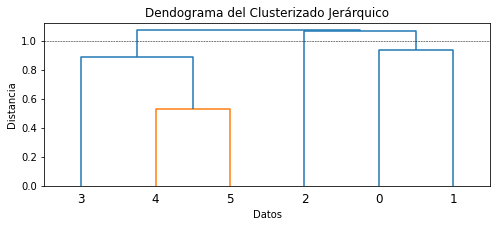

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Dendograma del Clusterizado Jerárquico")
plt.xlabel("Datos")
plt.ylabel("Distancia")
dendrogram(Z)
plt.axhline(y=1, c="k", ls="--", lw=0.5)
plt.show()

# Crea clusters planos a partir de la matriz linkage y de una distancia

In [ ]:
from scipy.cluster.hierarchy import fcluster
distancia_maxima =  1.065
etiquetas_cluster = fcluster(Z, distancia_maxima, criterion="distance")
etiquetas_cluster = pd.DataFrame(etiquetas_cluster, columns=["etiquetas cluster"])
pd.concat([df_corpus, etiquetas_cluster], axis=1)

,documento,categoria,etiquetas cluster
0,"project,gutenberg,ebook,merchant,venice,willia...",shakespeare_the_merchant_of_venice,2
1,"project,gutenberg,ebook,romeo,juliet,william,s...",shakespeare_romeo_juliet,2
2,"project,gutenberg,ebook,hamlet,william,shakesp...",shakespeare_hamlet,2
3,"project,gutenberg,ebook,christmas,carol,charle...",dickens_a_christmas_carol,1
4,"project,gutenberg,ebook,oliver,twist,charles,d...",dickens_oliver_twist,1
5,"project,gutenberg,ebook,tale,two,city,charles,...",dickens_a_tale_of_two_cities,1
